Its very important to know the type of Data to decide which Machine learning algorthim you have to use.There are three types of Data:

* Categorical Data
* Numerical Data
* Ordinal Data

In these notebook we will perfom following task:
* First we will look through data and explore
* We will see if data contains any missing value and try to fix it.
* Insights of data are always usefull hence we will explore through seaborn , matplotlib libraries.
* We will deploy through Logistic Regression Model.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/loan-predication'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv


In [2]:
raw_data = pd.read_csv('/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')

In [3]:
raw_data.shape

(614, 13)

In [4]:
raw_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
raw_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**First we deal with the missing values** 

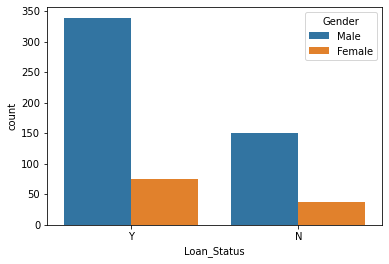

In [7]:
import seaborn as sns
sns.countplot('Loan_Status',hue='Gender',data=raw_data)

*Most probably after looking through the graph we are going to fill with mode of the data i.e 'Male'*

In [8]:
raw_data['Gender'] = raw_data['Gender'].fillna('Male')

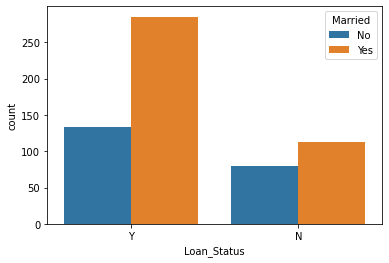

In [9]:
sns.countplot('Loan_Status',hue='Married',data=raw_data)

We can infer from this that those who were married were most probably to get the loan.

In [10]:
raw_data['Married'] = raw_data['Married'].fillna('Yes')

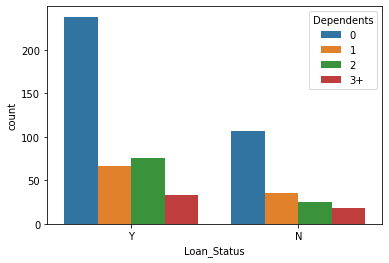

In [11]:
sns.countplot('Loan_Status',hue='Dependents',data=raw_data)

Since most of the dependents are 0 we are gonna fill with it with 0

In [12]:
raw_data['Dependents'] = raw_data['Dependents'].fillna('0')

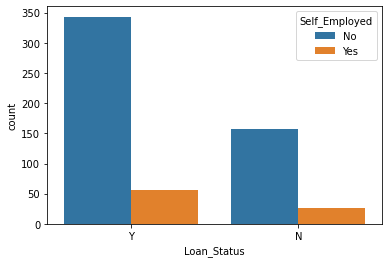

In [13]:
sns.countplot('Loan_Status',hue='Self_Employed',data=raw_data)

In [14]:
raw_data['Self_Employed'] = raw_data['Self_Employed'].fillna('Yes')

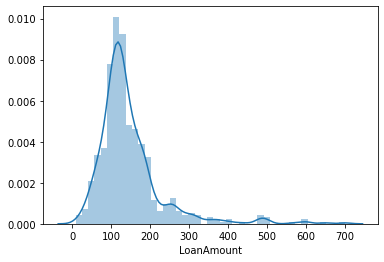

In [15]:
sns.distplot(raw_data['LoanAmount'])

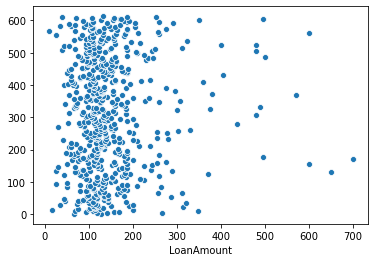

In [16]:
sns.scatterplot(raw_data['LoanAmount'],y=np.arange(0,614))

We see outliers as data seems to right skewed , so we will not fill values by mean of this data, we gonna take the mean without containing outliers.

In [17]:
mean=raw_data[raw_data['LoanAmount']<=400]['LoanAmount'].mean()
raw_data['LoanAmount'].fillna(mean,inplace=True)


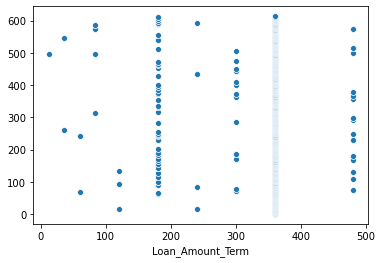

In [18]:
sns.scatterplot(raw_data['Loan_Amount_Term'],y=np.arange(0,614))

For the missing value we are going to use mode.

In [19]:
raw_data['Loan_Amount_Term'].fillna(raw_data['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)


In [20]:
raw_data['Credit_History'].unique()

array([ 1.,  0., nan])

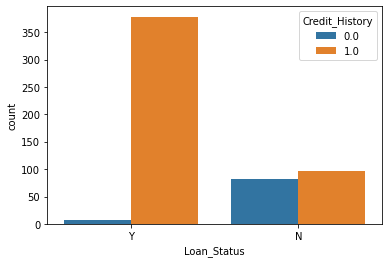

In [21]:
sns.countplot('Loan_Status',hue='Credit_History',data=raw_data)

*Again we are going to use mode*

In [22]:
raw_data['Credit_History'].fillna(raw_data['Credit_History'].value_counts().idxmax(), inplace=True)

In [23]:
raw_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
raw_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,137.186851,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Part 2
We are first going to one hot encode every Categorcial data then we are going to deploy it in our model

In [25]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df = raw_data.copy()

Let us check if the category doesnt contain any duplicates such as yes, YES ...

In [26]:
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Education'].unique())
print(df['Self_Employed'].unique())
print(df['Property_Area'].unique())

['Male' 'Female']
['No' 'Yes']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Rural' 'Semiurban']


In [27]:
df['Gender'] = lb.fit_transform(df['Gender'])
df['Married'] = lb.fit_transform(df['Married'])
df['Education'] = lb.fit_transform(df['Education'])
df['Self_Employed'] = lb.fit_transform(df['Self_Employed'])
df['Property_Area'] = lb.fit_transform(df['Property_Area'])
df['Loan_Status'] = lb.fit_transform(df['Loan_Status'])
df['Dependents'] = lb.fit_transform(df['Dependents'])

Lets see our result

In [28]:
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Education'].unique())
print(df['Self_Employed'].unique())
print(df['Property_Area'].unique())
print(df['Loan_Status'].unique())
print(df['Dependents'].unique())

[1 0]
[0 1]
[0 1]
[0 1]
[2 0 1]
[1 0]
[0 1 2 3]


In [29]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,137.186851,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Part 3
Deploying it in the model

In [30]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
std = StandardScaler()

In [32]:
unscaled_features = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
scaled_features = std.fit_transform(unscaled_features)
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = scaled_features

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.072991,-0.554487,-0.105907,0.273231,1.0,2,1
1,LP001003,1,1,1,0,0,-0.134412,-0.038732,-0.215292,0.273231,1.0,0,0
2,LP001005,1,1,0,0,1,-0.393747,-0.554487,-0.953506,0.273231,1.0,2,1
3,LP001006,1,1,0,1,0,-0.462062,0.251980,-0.310545,0.273231,1.0,2,1
4,LP001008,1,0,0,0,0,0.097728,-0.554487,-0.060505,0.273231,1.0,2,1


In [34]:
X = df.drop(['Loan_ID','Loan_Status'],axis=1)
y = df['Loan_Status']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lgt = LogisticRegression()
lgt.fit(X_train,y_train)
predict = lgt.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



**Hence from Logistic regression we get an accuracy of about 79%**<br>
Just as starting our Logisitic Regression performed well.

In [37]:
#Using Xgboost Classifier
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)


0.7560975609756098

In [38]:
# Using catboost Classifier
import catboost as cbg
cb = cbg.CatBoostClassifier()
cb.fit(X_train,y_train)
cb.score(X_test,y_test)


Learning rate set to 0.007604
0:	learn: 0.6887156	total: 55.5ms	remaining: 55.5s
1:	learn: 0.6847965	total: 57ms	remaining: 28.4s
2:	learn: 0.6808197	total: 58.4ms	remaining: 19.4s
3:	learn: 0.6768659	total: 59.7ms	remaining: 14.9s
4:	learn: 0.6729268	total: 61ms	remaining: 12.1s
5:	learn: 0.6689282	total: 62.3ms	remaining: 10.3s
6:	learn: 0.6654062	total: 63.6ms	remaining: 9.02s
7:	learn: 0.6617264	total: 65ms	remaining: 8.06s
8:	learn: 0.6579965	total: 66.4ms	remaining: 7.31s
9:	learn: 0.6541766	total: 67.7ms	remaining: 6.7s
10:	learn: 0.6505755	total: 69ms	remaining: 6.2s
11:	learn: 0.6466971	total: 70.3ms	remaining: 5.79s
12:	learn: 0.6431026	total: 71.5ms	remaining: 5.43s
13:	learn: 0.6401120	total: 72.4ms	remaining: 5.1s
14:	learn: 0.6366397	total: 73.7ms	remaining: 4.84s
15:	learn: 0.6331824	total: 75.3ms	remaining: 4.63s
16:	learn: 0.6303169	total: 76.8ms	remaining: 4.44s
17:	learn: 0.6265488	total: 78.1ms	remaining: 4.26s
18:	learn: 0.6235162	total: 79.4ms	remaining: 4.1s
19:	

0.7804878048780488

In [39]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=lgt)
ada.fit(X_train,y_train)
ada.score(X_test,y_test)

0.7886178861788617

**Consider this as just starting model, what more could be done:<br>**

1) Hyperparamater tunings of best model.<br>
2) Adding features using best feature engineering.<br>
3) I haven't tried neural network but you can use it.<br>
4) More over we can achieve atleast accuracy of 0.82-0.85, using proper hyperparameter tuning, and <br>
   using additional features.

# Feel free to comment any doubt , if you got more better result or thought of any other feature engineering you can comment, as sharing make us stronger.
** Thanks if you liked my work dont forget to upvote. **